<a href="https://colab.research.google.com/github/alihashemi8/romanian_map_paths/blob/main/bfs_dfs_arad_to_bucharest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# ساخت گراف
graph = {
    "Arad": {"Zerind": 75, "Sibiu": 140, "Timisoara": 118},
    "Zerind": {"Arad": 75, "Oradea": 71},
    "Oradea": {"Zerind": 71, "Sibiu": 151},
    "Sibiu": {"Arad": 140, "Oradea": 151, "Fagaras": 99, "Rimnicu Vilcea": 80},
    "Timisoara": {"Arad": 118, "Lugoj": 111},
    "Lugoj": {"Timisoara": 111, "Mehadia": 70},
    "Mehadia": {"Lugoj": 70, "Drobeta": 75},
    "Drobeta": {"Mehadia": 75, "Craiova": 120},
    "Craiova": {"Drobeta": 120, "Rimnicu Vilcea": 146, "Pitesti": 138},
    "Rimnicu Vilcea": {"Sibiu": 80, "Craiova": 146, "Pitesti": 97},
    "Fagaras": {"Sibiu": 99, "Bucharest": 211},
    "Pitesti": {"Rimnicu Vilcea": 97, "Craiova": 138, "Bucharest": 101},
    "Bucharest": {"Fagaras": 211, "Pitesti": 101}
}


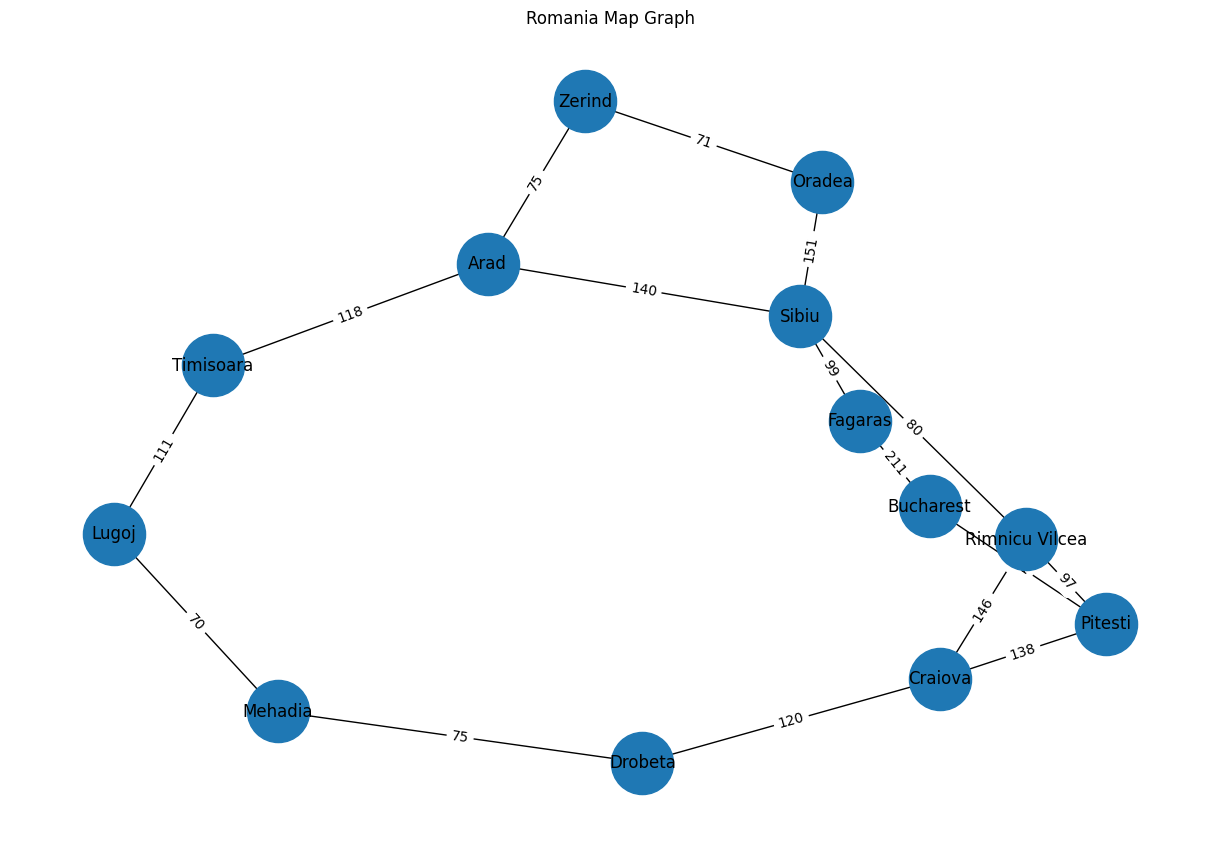

In [ ]:
G = nx.Graph()

for city in graph:
    for neighbor, cost in graph[city].items():
        G.add_edge(city, neighbor, weight=cost)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_size=2000)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Romania Map Graph")
plt.show()


In [ ]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([(start, [start], 0)])
    visited = set()
    explored_count = 0

    while queue:
        node, path, cost = queue.popleft()
        explored_count += 1

        if node == goal:
            return path, cost, explored_count

        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph[node].items():
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor], cost + weight))


In [ ]:
def dfs(graph, start, goal):
    stack = [(start, [start], 0)]
    visited = set()
    explored_count = 0

    while stack:
        node, path, cost = stack.pop()
        explored_count += 1

        if node == goal:
            return path, cost, explored_count

        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph[node].items():
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor], cost + weight))


In [ ]:
bfs_path, bfs_cost, bfs_nodes = bfs(graph, "Arad", "Bucharest")
dfs_path, dfs_cost, dfs_nodes = dfs(graph, "Arad", "Bucharest")

print("BFS Path:", bfs_path)
print("BFS Cost:", bfs_cost)
print("BFS Nodes Explored:", bfs_nodes)

print("\nDFS Path:", dfs_path)
print("DFS Cost:", dfs_cost)
print("DFS Nodes Explored:", dfs_nodes)


BFS Path: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
BFS Cost: 450
BFS Nodes Explored: 10

DFS Path: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']
DFS Cost: 733
DFS Nodes Explored: 8


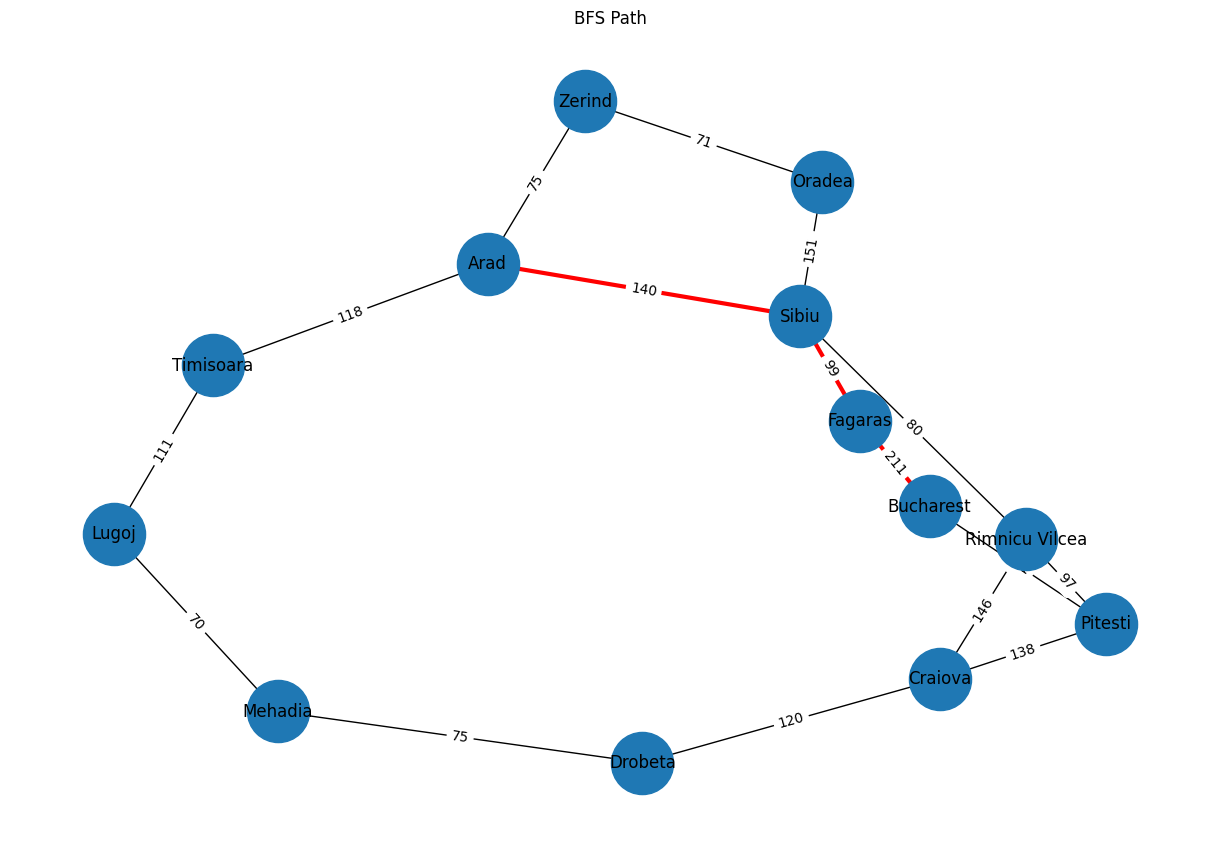

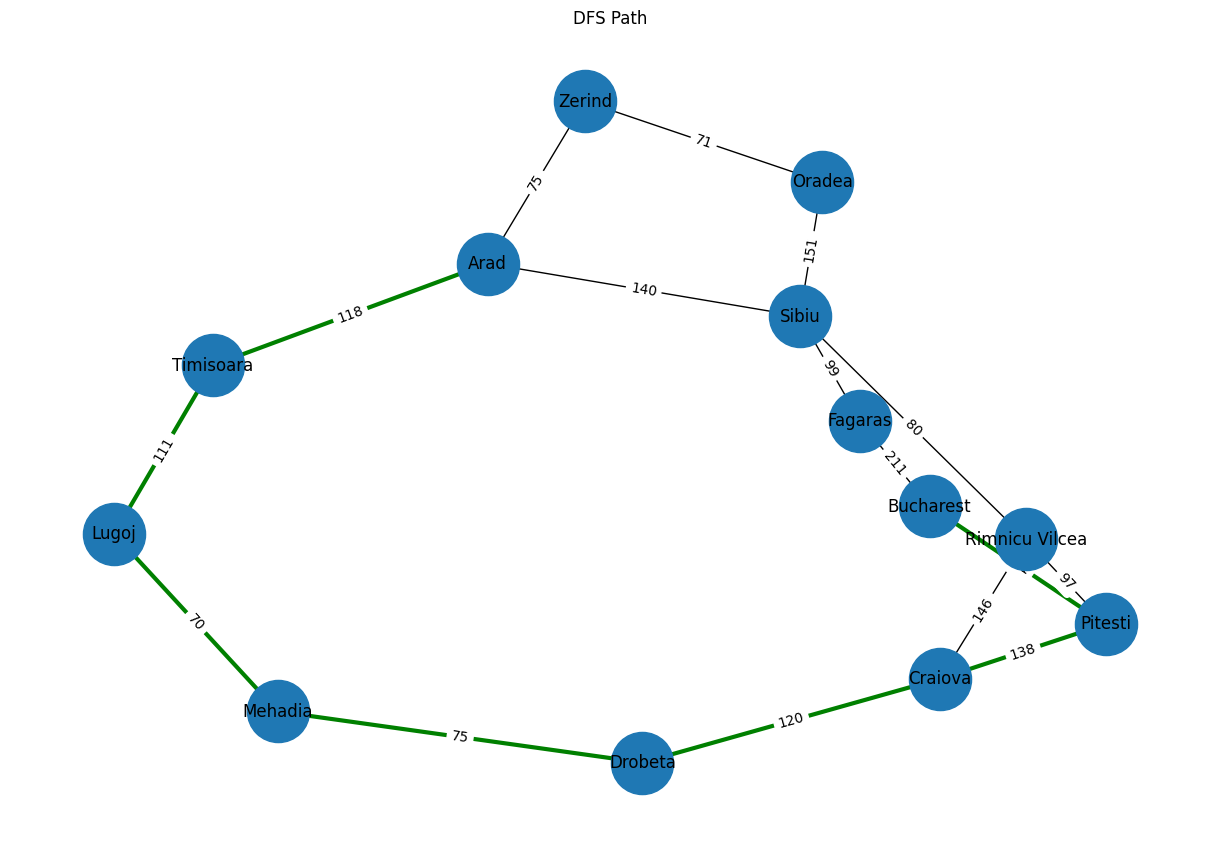

In [ ]:
def draw_path(path, color, title):
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000)
    edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

draw_path(bfs_path, "red", "BFS Path")
draw_path(dfs_path, "green", "DFS Path")


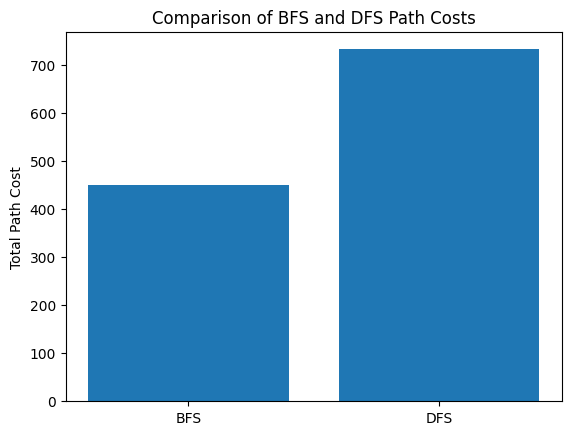

In [ ]:
methods = ["BFS", "DFS"]
costs = [bfs_cost, dfs_cost]

plt.bar(methods, costs)
plt.ylabel("Total Path Cost")
plt.title("Comparison of BFS and DFS Path Costs")
plt.show()
